In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train-data.csv')
test = pd.read_csv('test-data.csv')

In [2]:
train.head(n=5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
test.head(n=5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [7]:
test.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


# Select only numerical variable

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


num_train = train.select_dtypes(exclude=['object']).copy()
num_test = test.select_dtypes(exclude=['object']).copy()

In [9]:
num_train.isnull().sum()[num_train.isnull().sum() > 0]

Seats    42
dtype: int64

In [10]:
num_test.isnull().sum()[num_test.isnull().sum() > 0]

Seats    11
dtype: int64

In [11]:
num_train.Seats.fillna(value=round(num_train.Seats.mean()), inplace = True)
num_test.Seats.fillna(value=round(num_test.Seats.mean()), inplace = True)

In [12]:
X = num_train.drop(columns=['Unnamed: 0', 'Price'])
y = num_train['Price']

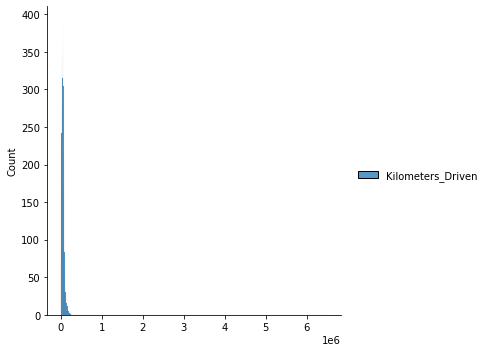

In [13]:
sns.displot(data=X[["Kilometers_Driven"]])

In [14]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [15]:
X['Kilometers_Driven'] = scaler.fit_transform(X[['Kilometers_Driven']])

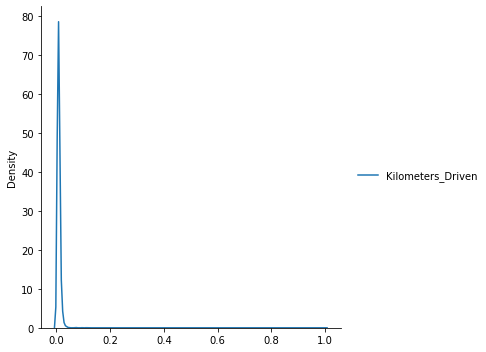

In [16]:
sns.displot(data=X[["Kilometers_Driven"]], kind="kde")

In [17]:
X.describe()

,Year,Kilometers_Driven,Seats
count,6019.000000,6019.000000,6019.000000
mean,2013.358199,0.009011,5.276790
std,3.269742,0.014042,0.806346
min,1998.000000,0.000000,0.000000
25%,2011.000000,0.005205,5.000000
50%,2014.000000,0.008128,5.000000
75%,2016.000000,0.011205,5.000000
max,2019.000000,1.000000,10.000000


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1234)

In [19]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_valid)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_preds = lr.predict(X_valid)
    
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    dt_preds = dt.predict(X_valid)
    
    
    results = list()
    results.append(mean_absolute_error(y_valid, rf_preds))
    results.append(mean_absolute_error(y_valid, lr_preds))
    results.append(mean_absolute_error(y_valid, dt_preds))
    return results


def cross_val_scores(X, y):
    rf = RandomForestRegressor()
    lr = LinearRegression()
    dt = DecisionTreeRegressor()
    models = [RandomForestRegressor(), LinearRegression(), DecisionTreeRegressor()]
    
    for model in models:
        print(model)
        scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(- scores)
        print(rmse_scores)
        print(rmse_scores.mean())
        print(rmse_scores.std())
        print()
    

In [20]:
score_dataset(X_train, X_test, y_train, y_test)

[6.733382113319741, 6.709422117265373, 7.444761805885145]

In [21]:
cross_val_scores(X, y)

RandomForestRegressor()
[11.28980494 12.03097832 10.67244034 11.28625153 11.35288299]
11.32647162232514
0.4307542842092077

LinearRegression()
[10.81008829 11.47872545 10.02681682 10.43439764 11.10767605]
10.771540850174757
0.5065298152816462

DecisionTreeRegressor()
[13.00039943 13.41089871 12.29482817 13.47041804 13.48516811]
13.132342493131882
0.45501950977739614



# Include Name and Location

In [22]:
batch2_train = train.copy()
batch2_test = test.copy()

In [23]:
column_to_dropped = ['Unnamed: 0', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']

batch2_train.drop(columns=column_to_dropped, inplace=True)
batch2_test.drop(columns=column_to_dropped, inplace=True)

In [24]:
batch2_train['Name'] = batch2_train.Name.apply(lambda x: x.split()[0])
batch2_test['Name']  = batch2_test.Name.apply(lambda x: x.split()[0])

In [25]:
batch2_train.head()

,Name,Location,Year,Kilometers_Driven,Seats,Price
0,Maruti,Mumbai,2010,72000,5.0,1.75
1,Hyundai,Pune,2015,41000,5.0,12.50
2,Honda,Chennai,2011,46000,5.0,4.50
3,Maruti,Chennai,2012,87000,7.0,6.00
4,Audi,Coimbatore,2013,40670,5.0,17.74


In [26]:
batch2_train.Seats.fillna(value=round(batch2_train.Seats.mean()), inplace = True)
batch2_test.Seats.fillna(value=round(batch2_test.Seats.mean()), inplace = True)

In [27]:
batch2 = pd.concat([batch2_train, batch2_test])
batch2.drop(columns=['Price'], inplace=True)

In [28]:
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

In [29]:
ohe = OneHotEncoder(sparse=False)

In [30]:
ohe.fit(batch2[['Name','Location']])

OneHotEncoder(sparse=False)

In [31]:
columns_trans = make_column_transformer((OneHotEncoder(), ['Name', 'Location']), remainder='passthrough')

In [32]:
columns_trans.fit(batch2)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Name', 'Location'])])

In [33]:
X = batch2_train.drop(columns=['Price'])
y = batch2_train['Price']

X=columns_trans.transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1234)

In [35]:
score_dataset(X_train, X_test, y_train, y_test)

[2.6060214661445973, 3.5286487595194664, 3.0295487264673313]

In [36]:
cross_val_scores(X, y)

RandomForestRegressor()
[4.76061292 5.55222005 4.65331949 5.72634206 6.3879067 ]
5.416080244108061
0.6435346908054124

LinearRegression()
[6.12747454 7.32592606 5.72142225 6.71674362 6.92488114]
6.563289524715922
0.5717667970556128

DecisionTreeRegressor()
[5.84437621 7.15934859 6.09121227 6.90562265 6.84891899]
6.569895742819372
0.5086329994065606

